# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [3]:
import pandas as pd
import numpy as np

def csv_to_df(file_name):
    data = pd.read_csv(file_name)
    df = pd.DataFrame(data)
    return df
crime_df = csv_to_df('Crime_Data_from_2020_to_Present.csv')

def date_format(df):
    date_array = ['Date Rptd', 'DATE OCC']
    for col in date_array:
        df[col] = df[col].astype(str).str.replace('/', '-',regex = False)
        df[col] = df[col].astype(str).str.replace(r'\s12:00:00\sAM', '', regex = True)
    df.sort_values(by = ['DATE OCC', 'Date Rptd'], axis = 0, ascending = True, inplace = True)
    df.reset_index(drop = True, inplace = True)
    return df
crime_df = date_format(crime_df)

def age_and_sex_fix(df):
    df['Vict Age'] = df['Vict Age'].replace(0, np.nan)
    df['Vict Age'] = df['Vict Age'].fillna(df['Vict Age'].mean())
    df['Vict Sex'] = df['Vict Sex'].replace('X', 'N/A')
    crime_df.to_csv('Cleaned_Crime_Data_2020_to_Present.csv', index = False)
    return df
crime_df = age_and_sex_fix(crime_df)

def df_to_csv(df):
    df.to_csv('Cleaned_Crime_Data_2020_to_Present.csv', index = False)
    print(df)
############ Function Call ############
df_to_csv(crime_df)

             DR_NO   Date Rptd    DATE OCC  TIME OCC  AREA   AREA NAME  \
0        201804032  01-01-2020  01-01-2020      1250    18   Southeast   
1        201804035  01-01-2020  01-01-2020      1430    18   Southeast   
2        201904054  01-01-2020  01-01-2020      1300    19     Mission   
3        201804023  01-01-2020  01-01-2020       140    18   Southeast   
4        201704023  01-01-2020  01-01-2020        20    17  Devonshire   
...            ...         ...         ...       ...   ...         ...   
1004986  240504007  12-31-2023  12-31-2023      1110     5      Harbor   
1004987  230517492  12-31-2023  12-31-2023       100     5      Harbor   
1004988  230901220  12-31-2023  12-31-2023      1624     9    Van Nuys   
1004989  240304005  12-31-2023  12-31-2023       700     3   Southwest   
1004990  240904007  12-31-2023  12-31-2023       230     9    Van Nuys   

         Rpt Dist No  Part 1-2  Crm Cd  \
0               1823         1     210   
1               1802       

## Web Collection Requirement \#1


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np


def table_to_html(url):
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(5)
    # the element in this website that contains the table adn allows infinte scrolling is a 
    # nested div tag with class name "infinite-scroll-container".
    # by targeting this element specifically we can scroll within it to load all table data.
    infinite_scroll = driver.find_element(By.CLASS_NAME, "infinite-scroll-container")

    # this line of code uses javascript to get the initial scroll height of the infinite scroll container.
    # this then allows us to compare the height before and after scrolling to determine if new content has loaded.
    current_height = driver.execute_script("return arguments[0].scrollHeight", infinite_scroll)
    previous_height = 0

    # we use a while loop to keep scrolling until no new content loads
    # this is accomplished by comparing the current scroll height to the previous height.
    # the initial condition of 0, ensures that the loop runs at least once.
    while current_height != previous_height:
        previous_height = current_height
        # this is the line of code that actually performs the scrolling action. 
        # arguments[0] refers to the infinite_scroll element that we passed in on  line 11.
        # the .scrollTo(0, scrollHeight) method scrolls the element to its maximum height, allowing us 
        # to load 25 more rows onto the table.
        driver.execute_script("arguments[0].scrollTo(0, arguments[0].scrollHeight);", infinite_scroll)
        time.sleep(3)
        current_height = driver.execute_script("return arguments[0].scrollHeight", infinite_scroll)

    # the following 2 lines of code use Selenium functions to extract the table html after scrolling
    # through the entire table. By passing the outerHTML attribute, to .get_attribute we get the full table html as a string.
    # this includes all elements within the table tag, such as thead, tbody, tr, td, etc.
    table = driver.find_element(By.CLASS_NAME, "table.feature-table")
    html = table.get_attribute("outerHTML")
    return html

def soup_to_df(html):
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table')
    thead = table.find('thead')
    tbody = table.find('tbody')

    header = []
    for span in thead.find_all('span'):
        header.append(span.text.strip())

    data = []
    for td in tbody.find_all('tr'):
        row = []
        for cell in td.find_all('td'):
            row.append(cell.text.strip())
        data.append(row)
    
    df = pd.DataFrame(data, columns=header, dtype = str)
    df.to_csv("felony_messy.csv", index=False)
    return df

def clean_data_to_excel(df, outputfile):
    df['SENTENCE_YEAR'] = df['SENTENCE_YEAR'].str.replace(r',', '', regex=True).astype(int)

    df['min_val'] = df['AGE_GROUP'].astype(str).str.extract(r'(\d+)').astype(float)
    df['max_val'] = df['AGE_GROUP'].astype(str).str.extract(r'-(\d+)').astype(float)
    mean = (df['min_val'] + df['max_val']) / 2
    stdev = (df['max_val'] - df['min_val']) / 6
    # we decided to use np.clip to avoid negative stdev values which would cause errors in np.random.normal
    # np.clip works by setting a minimum value (a_min) and maximum value (a_max) for the array values.
    stdev = np.clip(stdev, a_min=0.1, a_max=None)
    stdev = abs(stdev)
    # we assume that the max age is min age + 9 if no max age is given
    # certain entries are missing max age values, e.g. 70+
    df['max_val'] = df['max_val'].fillna(df['min_val'] + 9)
    df['Normal_Age'] = np.random.normal(mean, stdev, size=len(df)).astype(int)

    df.drop(columns=['min_val', 'max_val'], inplace=True)
    df.to_csv(outputfile, index=False)
    return df.head()

link = 'https://opendata.dc.gov/datasets/DCGIS::felony-sentences/explore'
html = table_to_html(link)

############ Function Call ############
print(clean_data_to_excel(soup_to_df(html), "felony_dc_clean.csv"))

## Web Collection Requirement #2

In [5]:
import requests
import json
import pandas as pd

url = "https://sharefulton.fultoncountyga.gov/resource/9w3w-ynjw.json"
response = requests.get(url)

records = json.loads(response.text)


def web_parser2(string):
    date_only = string.split("T")[0]   # gets first part of date     
    date_parts = date_only.split("-")       # stores year, month, and day into a list    
    year = date_parts[0]    
    month = date_parts[1]
    day = date_parts[2]
    new_date = month + "-" + day + "-" + year   # reformats the date
    return new_date

for record in records:
    record["reportdate"] = web_parser2(record["reportdate"])
    record["occurdate"] = web_parser2(record["occurdate"])

df = pd.DataFrame(records)
df.to_csv("Cleaned_FultonCrimeData.csv", index=False)

print(df[["reportdate", "occurdate"]].head(10))

############ Function Call ############

   reportdate   occurdate
0  02-07-2009  02-07-2009
1  02-19-2009  02-19-2009
2  03-01-2009  02-26-2009
3  05-26-2009  05-25-2009
4  06-18-2009  06-18-2009
5  01-09-2010  01-09-2010
6  02-08-2010  02-07-2010
7  03-07-2010  03-06-2010
8  05-15-2010  05-15-2010
9  07-12-2010  07-10-2010


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:
*   Web Collection #1 Source:
*   Web Collection #2 Source:



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:

## Insights

In [ ]:
def insight1():
  pass





############ Function Call ############
insight1()

### Insight 1 Explanation

Insert explanation here

In [ ]:
def insight2():
  pass





############ Function Call ############
insight2()

### Insight 2 Explanation

Insert explanation here

In [19]:
def insight3():
    df = pd.read_csv('felony_dc_clean.csv')
    df.dropna(subset = ['SENTENCE_IMPOSED_MONTHS', 'SENTENCE_SUSPENDED_MONTHS', 'SENTENCE_TO_SERVE_MONTHS', 'SENTENCE_PROBATION_MONTHS'],
              inplace = True)
    df['TOTAL_TIME_SERVED'] = df['SENTENCE_TO_SERVE_MONTHS'].astype(int) + df['SENTENCE_PROBATION_MONTHS'].astype(int)
    df['Percent Probation'] = np.where(df['SENTENCE_PROBATION_MONTHS'].astype(int) != 0,
                                       100 * (df['SENTENCE_TO_SERVE_MONTHS'].astype(int)/df['SENTENCE_PROBATION_MONTHS'].astype(int)),
                                       0)
    group = df.groupby(['OFFENSE_TYPE', 'RACE']).agg(
        avg_imposed_months = ('SENTENCE_IMPOSED_MONTHS', 'mean'),
        avg_time_served = ('TOTAL_TIME_SERVED', 'mean'),
        percent_probation = ('Percent Probation', 'mean')
    )
    group = group.rename(columns={
        'avg_imposed_months': 'Avg Imposed Months',
        'avg_time_served': 'Avg Time Served (Months)',
        'percent_probation': 'Avg Probation Share'
    })
    group = group.round(2)
    print(group)

############ Function Call ############
insight3()

                               Avg Imposed Months  Avg Time Served (Months)  \
OFFENSE_TYPE RACE                                                             
Drug         Asian                           9.00                      9.50   
             Black                          17.23                     19.00   
             Hispanic                       14.38                     16.38   
             Native American                16.00                     12.00   
             Other or Unknown               16.70                     18.60   
             White                          13.37                     16.03   
Homicide     Black                         231.25                    230.89   
             Hispanic                       84.00                     84.00   
             Other or Unknown              209.70                    209.45   
             White                         245.52                    247.86   
Other        Asian                           9.00   

### Insight 3 Explanation

Insert explanation here

In [32]:
from sklearn.linear_model import LinearRegression
def insight4():
    '''
    YOUTH CRIME over the years
    18-25 Years that results in incarceration
    '''
    df = pd.read_csv('felony_dc_clean.csv')
    df = df[(df['Normal_Age'] <= 25) & (df['Normal_Age'] >= 15)]
    df['Year'] = df['SENTENCE_YEAR'].astype(int)
    df = df[(df['SENTENCE_YEAR'] > 2012) & (df['SENTENCE_YEAR'] < 2018)]

    yearly = df.groupby('SENTENCE_YEAR').size().reset_index(name='YOUTH_CRIME_COUNT')

    print("Training data:")
    print(yearly)

    X = yearly[['SENTENCE_YEAR']]    
    y = yearly['YOUTH_CRIME_COUNT']  

    model = LinearRegression()
    model.fit(X, y)

    prediction = model.predict([[2019]])

    print(f"2019: {prediction}")

    return prediction[0]

############ Function Call ############
insight4()

Training data:
   SENTENCE_YEAR  YOUTH_CRIME_COUNT
0           2013               1072
1           2014               1075
2           2015                786
3           2016                881
4           2017                895
2019: [722.6]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



np.float64(722.6000000000058)

### Insight 4 Explanation

Insert explanation here

In [ ]:
def insight5():
  pass





############ Function Call ############
insight5()

### Insight 5 Explanation

Insert explanation here

## Data Visualizations

In [ ]:
def visual1():
  pass





############ Function Call ############
visual1()

### Visualization 1 Explanation

Insert explanation here

In [ ]:
def visual2():
  pass





############ Function Call ############
visual2()

### Visualization 2 Explanation

Insert explanation here

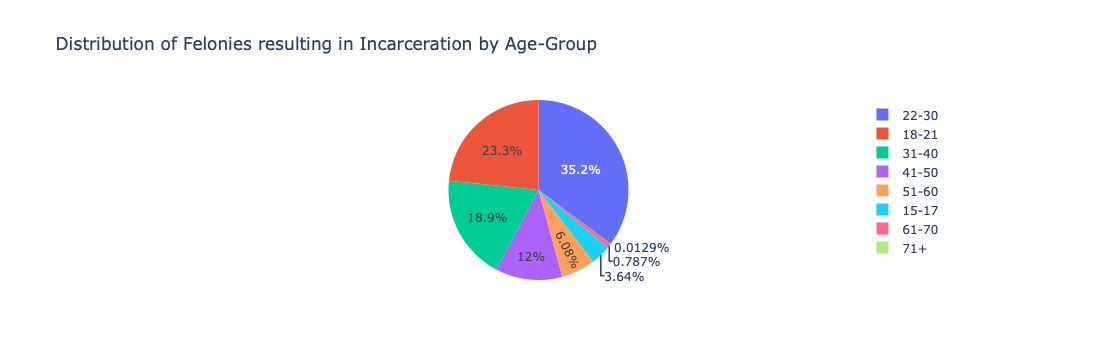

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np

def visual3(input_file):
    df = pd.read_csv(input_file)
    df.dropna(subset=['AGE_GROUP'], inplace = True)
    df = df[df['SENTENCE_TYPE'].str.lower().isin(['incarceration', 'long split'])]
    fig = px.pie(df, names = 'AGE_GROUP', title = 'Distribution of Felonies resulting in Incarceration by Age-Group', labels='count')
    fig.show()


############ Function Call ############
visual3('felony_dc_clean.csv')

### Visualization 3 Explanation

Insert explanation here

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
